In [40]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from renyi import renyi_divergence_cont, renyi_divergence_hist
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [16]:
data1 = np.random.normal(0,1,1000000)
data2 = np.random.normal(1,1.5,1000000)

pdf1 = lambda x: stats.norm.pdf(x,0,1)
pdf2 = lambda x: stats.norm.pdf(x,1,1.5)

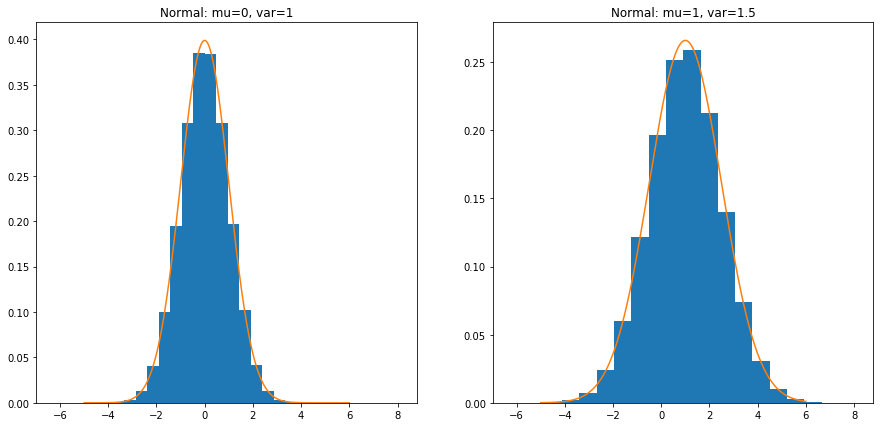

In [17]:
plt.figure(figsize=(15,7))

ax1 = plt.subplot(1,2,1)
plt.title("Normal: mu=0, var=1")
plt.hist(data1, bins=20, density=1)
x = np.linspace(-5,6,1000)
plt.plot(x,pdf1(x))

plt.subplot(1,2,2, sharex=ax1)
plt.title("Normal: mu=1, var=1.5")
plt.hist(data2, bins=20, density=1)
plt.plot(x,pdf2(x))

plt.show()

In [86]:
D_KL = renyi_divergence_cont(pdf1, pdf2, 1, -float("inf"), float("inf"))
KL_hist = []
# vemo, da dobimo za stolpce do 5 brezvezne rezultate.
for i in range(5,101):
    KL_hist.append([])
    for j in range(5,101):
        (y1,x1) = np.histogram(data1, bins=i, density=1)
        (y2,x2) = np.histogram(data2, bins=j, density=1)
        KL_hist[i-5].append(renyi_divergence_hist(x1,y1,x2,y2,1))
    print(i, sep=" ", end=',', flush=True)
KL_hist = np.array(KL_hist)

5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

In [88]:
KL_hist_razlika = []
for i in range(5,101):
    KL_hist_razlika.append([])
    for j in range(5,101):
        KL_hist_razlika[i-5].append(abs(KL_hist[i-5][j-5]-D_KL)/D_KL)
        
KL_hist_razlika = np.array(KL_hist_razlika)

In [89]:
X = range(5,101)
Y = range(5,101)
X,Y = np.meshgrid(X,Y)

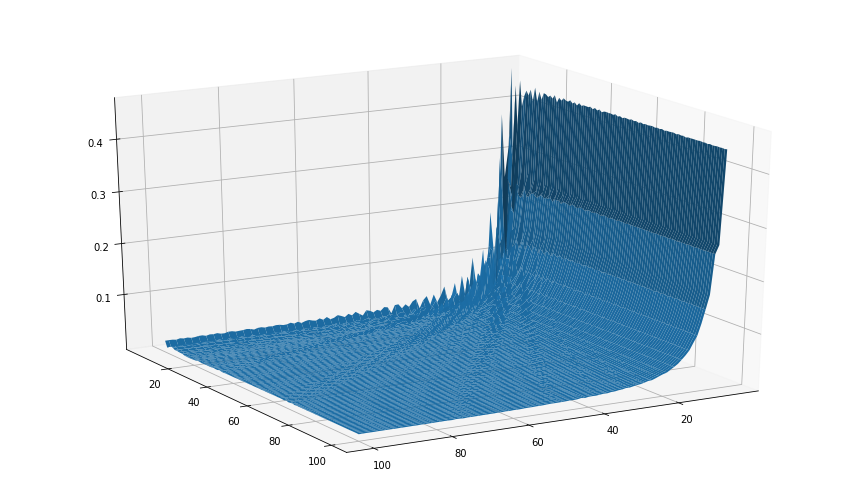

In [91]:
fig = plt.figure(figsize=(15,9))
ax = fig.gca(projection='3d')
ax.view_init(elev=22,azim=60)
surf = ax.plot_surface(X, Y, KL_hist_razlika,rstride=1, cstride=2)

<font size=4>Relativna razlika med KL divergenco (teoretično) in KL divergenco glede na histogram gre proti nič, ko gre šteivlo stolpcev obeh histogramov proti nekemu velikemu številu. Poglejmo pa si, kako majhno je lahko število stolpcev, če je za nas sprejemljiva 5% napaka.

In [101]:
# Recimo, da je za nas ok 5% odstopanje. Poglejmo, kje se to zgodi.
perc1_i = []
perc1_j = []
perc1 = []
for i in range(5,30):
    for j in range(5,30):
        if KL_hist_razlika[i-5][j-5] <= 0.05:
            perc1.append((i,j))
            perc1_i.append(i)
            perc1_j.append(j)

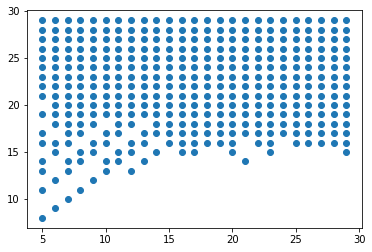

In [104]:
plt.scatter(perc1_i, perc1_j)
plt.show() # rezultat bo prikazal točke, kjer je odstopanje manjše od 5%

<font size=4>Vidimo, da je relativna razlika med KL divergenco (teoretično) in KL divergenco glede na histogram manjša kot 5%, ko je število stolpcev več ali enako 15. Poglejmo si, kakšne rezultate za optimalno število stolpcev pa dajejo metode za optimalno število stolpcev.

In [112]:
from optimalBinNumber import optBinNum

print("METODA | DATA_1 | DATA_2")
print("-------+--------+-------")
print("sqrt   |", optBinNum(data1, "sqrt"), "  |", optBinNum(data2, "sqrt"))
print("rice   |", optBinNum(data1, "rice"), "   |", optBinNum(data2, "rice"))
print("scott  |", optBinNum(data1, "scott"), "   |", optBinNum(data2, "scott"))
print("sturges|", optBinNum(data1, "sturges"), "    |", optBinNum(data2, "sturges"))
print("fd     |", optBinNum(data1, "fd"), "   |", optBinNum(data2, "fd"))

METODA | DATA_1 | DATA_2
-------+--------+-------
sqrt   | 1000   | 1000
rice   | 200    | 200
scott  | 274    | 274
sturges| 21     | 21
fd     | 355    | 354


<font size=4>Metode dajejo zelo velika optimalna števila stolpcev, ker je podatkov veliko, vse metode pa deloma ali v celoti temeljijo na številu podatkov vzorca. Ampak vemo, da tudi za tako velika števila, kot jih vrnejo metode, bo razlika med KL divergenco (teoretično) in KL divergenco glede na histograma izjemno majhna - to je posledica velikega števila podatkov.